In [1]:
!pip install selenium

In [6]:
from selenium import webdriver

driver = webdriver.Chrome('chromedriver.exe')
driver.get("http://www.naver.com")


In [7]:
xpath = """//*[@id="account"]/div/a/i"""

driver.find_element_by_xpath(xpath).click()

In [9]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("id")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("pw")

In [11]:
driver.get("http://mail.naver.com")

In [26]:
driver1=webdriver.Chrome('chromedriver.exe')
driver1.get('http://www.opinet.co.kr')

In [29]:
driver1.find_element_by_xpath('//*[@id="SIDO_NM0"]/option[2]').click()

In [32]:
gu_list_raw=driver1.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list=gu_list_raw.find_elements_by_tag_name("option")

In [34]:
gu_names=[option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [37]:
el=driver1.find_element_by_id("SIGUNGU_NM0")
el.send_keys("동대문구")

In [42]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    els=driver1.find_element_by_id("SIGUNGU_NM0")
    els.send_keys(gu)
    time.sleep(2)
    
    

c:\users\python\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [44]:
driver1.close()

InvalidSessionIdException: Message: invalid session id


In [45]:
import pandas as pd
import glob

In [47]:
stations_files = glob.glob("./excel/지역*.xls")

주유소 엑셀파일 통합

In [49]:
# concat() 을 이용하여 엑셀 파일을 합칠 수 있음
# 합치려고 하는 파일의 필드가 같아야 한다.

tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [50]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1575,1427,-
1,서울특별시,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1815,1585,1429,-
2,서울특별시,고속셀프주유소,서울 강동구 천호대로 1246,SK에너지,02-487-2030,Y,1925,1595,1435,1179
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1595,1415,-
4,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1596,1476,1147
...,...,...,...,...,...,...,...,...,...,...
37,서울특별시,오천주유소,서울 강남구 봉은사로 503 (삼성동),SK에너지,02-545-2822,N,2289,1999,1879,1319
38,서울특별시,금성주유소,서울 강남구 테헤란로 619 (삼성동),SK에너지,02-508-6572,N,2189,1999,1895,-
39,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2498,2218,2038,1460
40,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [51]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 41
Data columns (total 10 columns):
지역       502 non-null object
상호       502 non-null object
주소       502 non-null object
상표       502 non-null object
전화번호     502 non-null object
셀프여부     502 non-null object
고급휘발유    502 non-null object
휘발유      502 non-null object
경유       502 non-null object
실내등유     502 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


In [83]:
# 차트로 작업할 필요한 정보만 추출
stations = pd.DataFrame({'gas_station' : station_raw['상호'],
                       'address' : station_raw['주소'],
                       'Gasoline' : station_raw['휘발유'],
                       '셀프' : station_raw['셀프여부']})

stations

,gas_station,address,Gasoline,셀프
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585,N
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N
...,...,...,...,...
37,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999,N
38,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999,N
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218,N
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N


In [84]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['address']]
stations.head()

,gas_station,address,Gasoline,셀프,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,강동구
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585,N,강동구
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,강동구


In [85]:
stations[stations['구']=="관악구"]

,gas_station,address,Gasoline,셀프,구
0,유림주유소,서울 관악구 신림로 176 (신림동),1543,N,관악구
1,(주)연우에너지 신관주유소,서울 관악구 신림로 290 (신림동) 신관주유소,1544,Y,관악구
2,(주)엠오티이엔지 직영 삼화주유소,서울 관악구 보라매로 41 (봉천동),1554,N,관악구
3,남현주유소,서울 관악구 남부순환로 2014 (남현동),1574,Y,관악구
4,서일석유(주)락성주유소,서울특별시 관악구 남부순환로 1920 (봉천동),1574,Y,관악구
5,현대오일뱅크(주)직영 관악셀프주유소,서울 관악구 남부순환로 1520 (신림동),1574,Y,관악구
6,현대주유소,서울 관악구 난곡로 108 (신림동),1589,N,관악구
7,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1589,Y,관악구
8,지에스칼텍스㈜ 난곡주유소,서울 관악구 난곡로 206,1593,N,관악구
9,SK에너지(주)직영 대공원주유소,서울 관악구 과천대로 921 (남현동),1599,N,관악구


In [105]:
station_raw=station_raw[station_raw['휘발유']!='-']

In [106]:
station_raw['휘발유'] = [float(value) for value in station_raw['휘발유']]

In [87]:
stations=stations[stations['Gasoline']!='-']

In [89]:
stations[stations['셀프']=='Y']

,gas_station,address,Gasoline,셀프,구
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,강동구
6,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1598,Y,강동구
8,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1599,Y,강동구
9,(주)소모에너지엔테크놀러지 성내주유소,서울 강동구 올림픽로 578 (성내동),1618,Y,강동구
...,...,...,...,...,...
14,지에스칼텍스㈜ 삼성로주유소,서울 강남구 삼성로 563 (삼성동),1654,Y,강남구
16,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1657,Y,강남구
17,대동석유 압구정주유소,서울 강남구 언주로 842 (신사동),1658,Y,강남구
20,SK네트웍스(주) 매봉주유소,서울 강남구 언주로 307,1675,Y,강남구


In [90]:
stations['Gasoline'] = [float(value) for value in stations["Gasoline"]]
stations

c:\users\python\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gas_station,address,Gasoline,셀프,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575.0,N,강동구
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585.0,N,강동구
2,고속셀프주유소,서울 강동구 천호대로 1246,1595.0,Y,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595.0,Y,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596.0,N,강동구
...,...,...,...,...,...
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335 (대치동),1998.0,N,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1999.0,N,강남구
37,오천주유소,서울 강남구 봉은사로 503 (삼성동),1999.0,N,강남구
38,금성주유소,서울 강남구 테헤란로 619 (삼성동),1999.0,N,강남구


In [78]:
!pip install seaborn

In [93]:
#%%writefile "C:/PY/Day 9/예제/pandas 그래프 폰트설정.txt"

import seaborn as sns
import platform
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

path = "c:\windows\fonts\malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

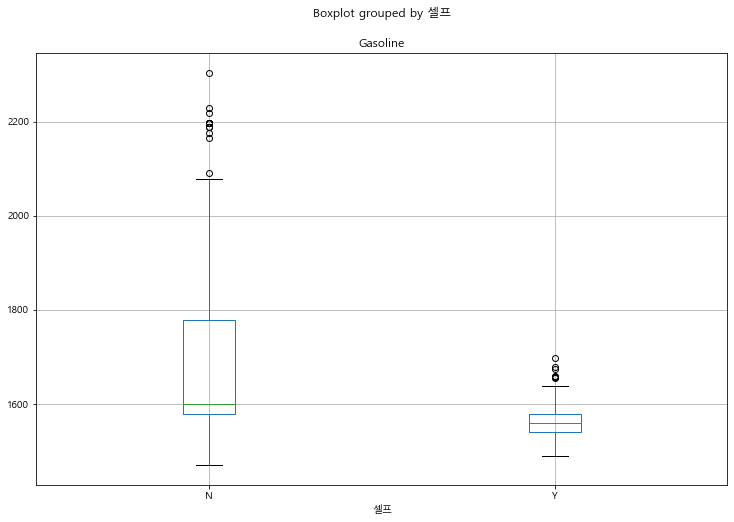

In [97]:
stations.boxplot(column='Gasoline', by='셀프', figsize=(12,8))

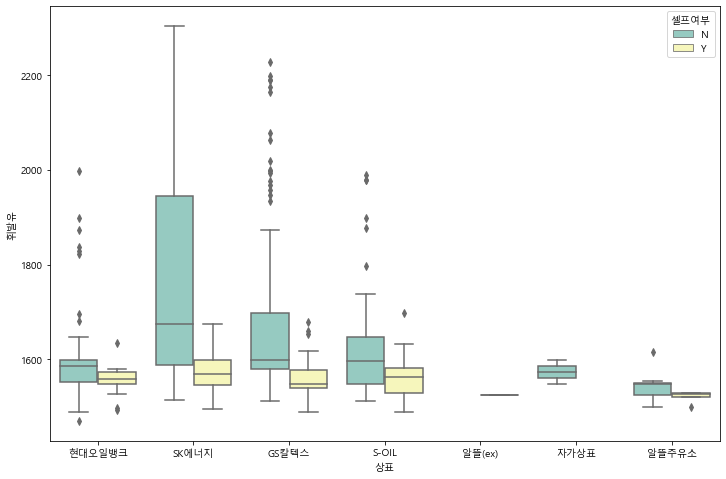

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='휘발유', hue='셀프여부', data=station_raw, palette='Set3')

In [ ]:
plt.